In [1]:
import numpy as np
import pandas as pd
from pycaret.classification import *

In [2]:
df1 = pd.read_csv("training.csv")
df2 = pd.read_csv("testing.csv")
dftrain,dftest = df1,df2

In [3]:
clf1 = setup(data = dftrain, 
             target = 'Attrition'
             , use_gpu=True   
             ,test_data=dftest
             , normalize = True
              ,feature_selection = True
             ,fix_imbalance = True
             ,bin_numeric_features = ['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears'
                                        ,'EmployeeNumber','YearsAtCompany'
                                    ]
            )


,Description,Value
0,session_id,918
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1177, 27)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
top10 = compare_models(n_select = 10,sort='F1',cross_validation=False,exclude = ['lightgbm','ridge','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8669,0.7775,0.3191,0.6818,0.4348,0.3704,0.4048,1.0300
lr,Logistic Regression,0.7543,0.7666,0.5745,0.3418,0.4286,0.2847,0.3003,0.1400
catboost,CatBoost Classifier,0.8669,0.7885,0.2979,0.7000,0.4179,0.3563,0.3980,4.5200
lda,Linear Discriminant Analysis,0.7201,0.7436,0.5745,0.3034,0.3971,0.2368,0.2573,0.1100
ada,Ada Boost Classifier,0.7986,0.7673,0.4043,0.3800,0.3918,0.2712,0.2714,0.2800
xgboost,Extreme Gradient Boosting,0.8498,0.7847,0.2979,0.5600,0.3889,0.3123,0.3326,134.4100
nb,Naive Bayes,0.3754,0.6159,0.9574,0.1991,0.3297,0.0873,0.1937,0.0300
qda,Quadratic Discriminant Analysis,0.3549,0.5986,0.9574,0.1940,0.3226,0.0761,0.1783,0.1600
dt,Decision Tree Classifier,0.7543,0.5955,0.3617,0.2881,0.3208,0.1731,0.1748,0.0700
et,Extra Trees Classifier,0.8601,0.7515,0.1915,0.7500,0.3051,0.2566,0.3320,0.2300


In [5]:
tuned_top10 = [(tune_model(i, optimize = 'F1')) for i in top10]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7627,0.7267,0.5789,0.3548,0.4400,0.3003,0.3148
1,0.7203,0.6853,0.3158,0.2308,0.2667,0.0990,0.1009
2,0.8136,0.8251,0.5789,0.4400,0.5000,0.3880,0.3935
3,0.7458,0.6305,0.3158,0.2609,0.2857,0.1328,0.1337
4,0.7797,0.8065,0.7368,0.4000,0.5185,0.3915,0.4222
5,0.7627,0.7097,0.4737,0.3333,0.3913,0.2494,0.2554
6,0.7542,0.7602,0.5789,0.3438,0.4314,0.2874,0.3033
7,0.8034,0.6998,0.5263,0.4167,0.4651,0.3467,0.3502
8,0.7863,0.6627,0.5263,0.3846,0.4444,0.3161,0.3221
9,0.7607,0.7143,0.3684,0.3043,0.3333,0.1891,0.1904


In [14]:
stacker = stack_models(estimator_list = [top10[0]]+top10[2:], meta_model = top10[1])
pred = predict_model(stacker)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8305,0.6140,0.0526,0.3333,0.0909,0.0492,0.0757
1,0.8475,0.7108,0.1053,0.6667,0.1818,0.1442,0.2222
2,0.8983,0.9282,0.3684,1.0000,0.5385,0.4946,0.5732
3,0.8305,0.6762,0.0526,0.3333,0.0909,0.0492,0.0757
4,0.8559,0.7464,0.1579,0.7500,0.2609,0.2170,0.3002
5,0.8305,0.8113,0.1579,0.4286,0.2308,0.1577,0.1828
6,0.8559,0.7081,0.2105,0.6667,0.3200,0.2630,0.3184
7,0.8718,0.7422,0.2632,0.8333,0.4000,0.3493,0.4230
8,0.8376,0.7358,0.4211,0.5000,0.4571,0.3625,0.3643
9,0.8718,0.7025,0.2632,0.8333,0.4000,0.3493,0.4230


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8601,0.7863,0.1702,0.8000,0.2807,0.2378,0.3276


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


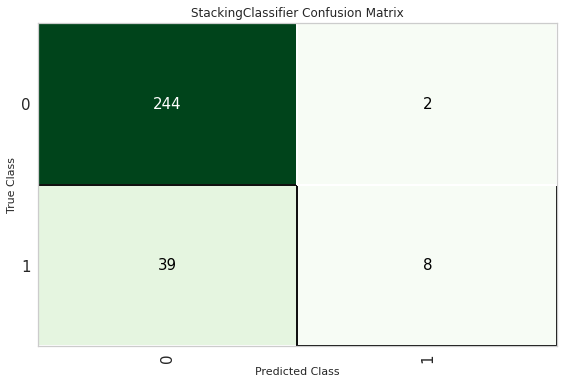

In [15]:
plot_model(stacker, plot='confusion_matrix')

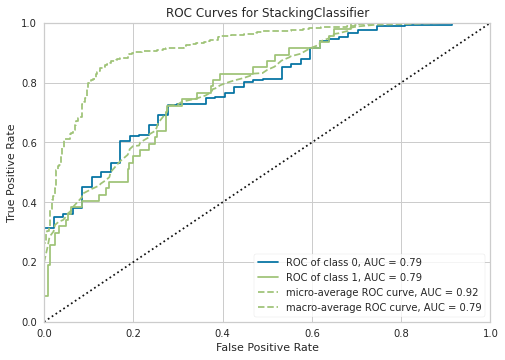

In [16]:
# AUC 
plot_model(stacker, plot = 'auc')

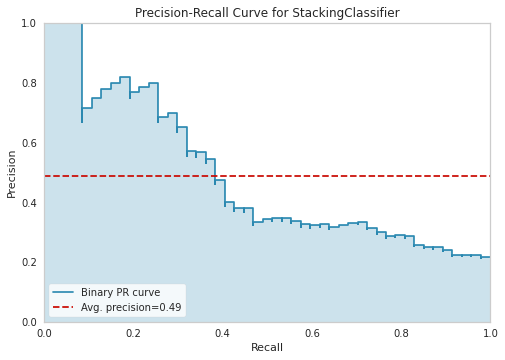

In [17]:
# PR
plot_model(stacker, plot = 'pr')

In [9]:
blender = blend_models(estimator_list=top10, method='soft')
pred = predict_model(blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8305,0.6980,0.4211,0.4706,0.4444,0.3448,0.3456
1,0.8136,0.6959,0.1579,0.3333,0.2143,0.1236,0.1347
2,0.8814,0.8767,0.6316,0.6316,0.6316,0.5609,0.5609
3,0.8390,0.7193,0.2105,0.5000,0.2963,0.2221,0.2487
4,0.7542,0.7464,0.4211,0.3077,0.3556,0.2082,0.2121
5,0.6949,0.7358,0.7368,0.3111,0.4375,0.2729,0.3206
6,0.7458,0.5731,0.2105,0.2105,0.2105,0.0590,0.0590
7,0.6752,0.6289,0.3158,0.1935,0.2400,0.0484,0.0507
8,0.5128,0.5166,0.4211,0.1481,0.2192,-0.0277,-0.0358
9,0.7863,0.6923,0.4211,0.3636,0.3902,0.2616,0.2626


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8020,0.7884,0.5319,0.4098,0.4630,0.3441,0.3485


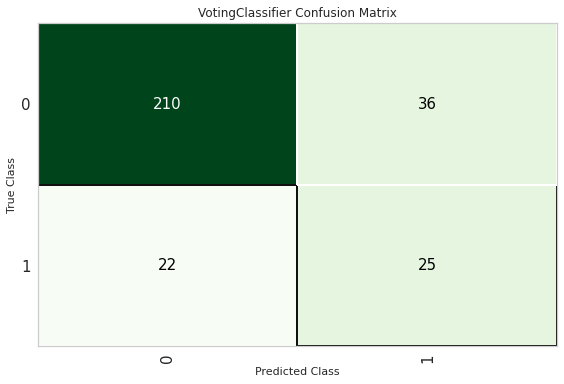

In [18]:
plot_model(blender, plot='confusion_matrix')

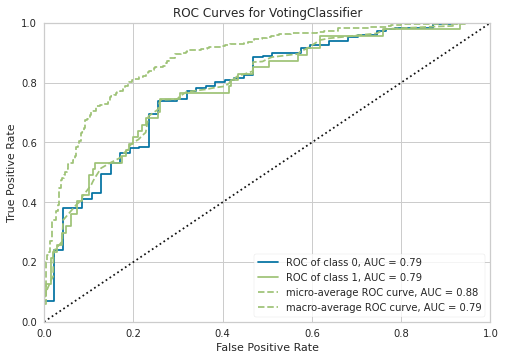

In [10]:
# AUC 
plot_model(blender, plot = 'auc')

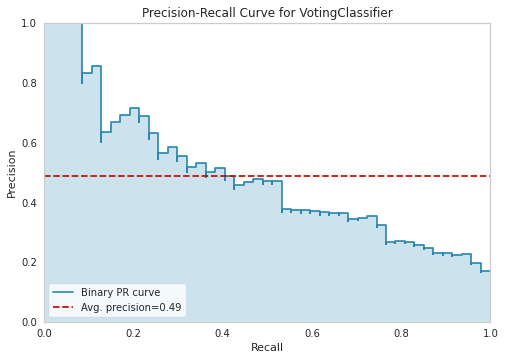

In [11]:
# PR
plot_model(blender, plot = 'pr')